Калибровка магнита

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnd
import tikzplotlib as convert

In [2]:
I = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.26])

B = np.array([0.0, 119.3, 237.3, 361.1, 485.1, 603.7, 709.9, 814.6, 883.9, 930.2, 970.1, 1006.8, 1038.5]) / 1000

In [3]:
IB = I[:8] * B[:8]
II = I[:8] * I[:8]
BB = B[:8] * B[:8]
k = IB.sum() / II.sum()
sigma_k = (1 / 7 * (BB.sum() / II.sum() - k ** 2)) ** 0.5

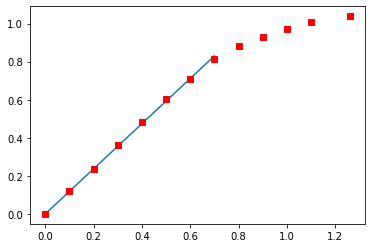

In [4]:
plt.plot(I[:8], k * I[:8])
plt.plot(I, B, "rs")

# convert.save("plot1.tex")

In [5]:
print(k, ' ', sigma_k)

1.18555   0.007168073347153429


Исследование серебра

In [6]:
B = k * I[:8]
a = 3 / 75

In [7]:
I1 = 0.2
U1 = a * np.array([-2, -2, -2, -2, -2, -1, 0, 0])
R1 = -2 * a

In [8]:
I2 = 0.4
U2 = a * np.array([-5, -4, -3.5, -2.5, -1.5, -0.5, 0, 1])
R2 = -5 * a

In [9]:
I3 = 0.6
U3 = a * np.array([-5, -4, -2.5, -1, 0.5, 2.5, 4, 5.5])
R3 = -5 * a

In [10]:
I4 = 0.8
U4 = a * np.array([-7, -5, -3, -1, 1, 3, 5, 7])
R4 = -7 * a

In [11]:
I5 = 1.0
U5 = a * np.array([-2, 1, 3.5, 6, 8.5, 11, 13.5, 16])
R5 = -2 * a

In [12]:
# обратное поле

I6 = 1.0
U6 = a * np.array([-1, -4, -7, -9, -12, -14.5, -17.5, -20.5])
R6 = -1 * a

In [13]:
I_arr = np.array([I1, I2, I3, I4, I5, I6])
U_arr = np.array([U1, U2, U3, U4, U5, U6])
R_arr = np.array([R1, R2, R3, R4, R5, R6])

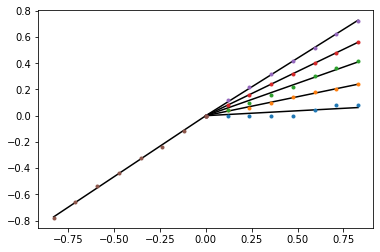

In [14]:
g = np.zeros(6)
sigma_g = np.zeros(6)

for i in range(6):
    s = np.sign (4.5 - i)
    BU = s * B * (U_arr[i] - R_arr[i])
    BB = B * B
    UU = (U_arr[i] - R_arr[i]) * (U_arr[i] - R_arr[i])
    g[i] = BU.sum() / BB.sum()
    sigma_g[i] = (1 / 5 * np.abs(((UU.sum() / BB.sum()) - g[i] ** 2))) ** 0.5
    plt.plot(s * B, g[i] * B * s, 'black')
    plt.plot(s * B, U_arr[i] - R_arr[i], '.')

# convert.save("plot2.tex")

In [15]:
print(g, '\n', sigma_g)

[0.07470915 0.2891967  0.49404436 0.67479229 0.87722998 0.93024937] 
 [1.86364279e-02 4.81994493e-03 1.15578219e-02 4.71216092e-09
 7.54440716e-03 8.95265037e-03]


Рассчёт постоянной Холла для серебра

In [16]:
g[4] = 0.5 * (g[4] + g[5])
g = g[:5]
I_arr = I_arr[:5]

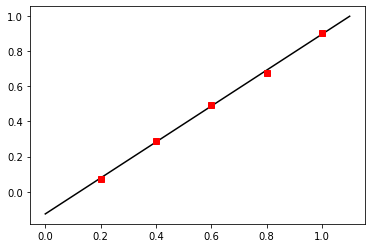

In [17]:
kf, err = np.polyfit(I_arr, g, deg=1, cov = True)
gI = g * I_arr
II = I_arr * I_arr
gg = g * g
Dxy = gI.sum() / gI.size - (g.sum() / g.size) * (I_arr.sum() / I_arr.size)
Dxx = II.sum() / II.size - (I_arr.sum() / I_arr.size) ** 2
Dyy = gg.sum() / gg.size - (g.sum() / g.size) ** 2
sigma_kf = (1 / 3 * (Dyy / Dxx - kf[0] ** 2)) ** 0.5
x = np.linspace(0, 1.1, 2)
plt.plot(x, kf[0] * x + kf[1], 'black')
plt.plot(I_arr, g, 'rs')

# convert.save("plot3.tex")

In [18]:
print(kf[0], ' ', sigma_kf)

1.0218283256113798   0.019229506423313305


Исследование цинка

In [19]:
I = 1
U = a * np.array([23, 21, 18.5, 16, 14, 11, 9, 7])
R = a * 23

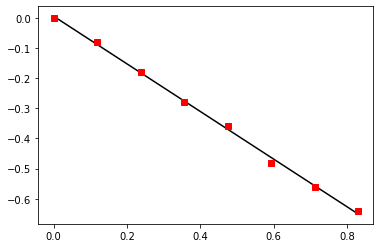

In [20]:
kf, err = np.polyfit(B, U - R, deg=1, cov = True)
BU = B * U
BB = B * B
UU = (U - R) * (U - R)
Dxy = BU.sum() / BU.size - ((U - R).sum() / (U - R).size) * (B.sum() / B.size)
Dxx = BB.sum() / BB.size - (B.sum() / B.size) ** 2
Dyy = UU.sum() / UU.size - ((U - R).sum() / (U - R).size) ** 2
sigma_kf = (1 / 3 * (Dyy / Dxx - kf[0] ** 2)) ** 0.5
plt.plot(B, kf[0] * B + kf[1], 'black')
plt.plot(B, U - R, 'rs')

# convert.save("plot4.tex")

In [21]:
print(kf[0], ' ', sigma_kf)

-0.7892659826361482   0.018624304362444014
